In [48]:
## LEVEL 1 TASK 1 PART 1

import pandas as pd
df=pd.read_excel("C:/Users/varsh/OneDrive/Documents/Varsha/Internship Assignment/Cognifyz/Data.xlsx")
print(df.info())
col= df["Cuisines"]
b=col.tolist()
d1=[]
for i in b:
    if str(i)!="nan":
        d1.append(i)
combined_string = ",".join(d1)
x=combined_string.split(",")
cleaned_list = [i.strip() for i in x]
word_freq = {}
for word in cleaned_list:
    # Update the frequency count for each word
    word_freq[word] = word_freq.get(word, 0) + 1
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True) 
table= pd.DataFrame(sorted_word_freq)
print(table)
TABLE=table.rename(columns={0: "Cuisine",1:"Frequency"})
print("North Indian, Chinese, Fast Food are the top three most common cuisines in the dataset")
print(TABLE)

# TASK 1 PART 2
table1 = TABLE
table1["Percentage"]=100*TABLE["Frequency"]/len(df)
print("Following are the percentage of restaurants that serve each of the top cuisines")
print(table1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9548 non-null   int64  
 1   Restaurant Name       9548 non-null   object 
 2   Country Code          9548 non-null   int64  
 3   City                  9548 non-null   object 
 4   Address               9548 non-null   object 
 5   Locality              9548 non-null   object 
 6   Locality Verbose      9548 non-null   object 
 7   Longitude             9548 non-null   float64
 8   Latitude              9548 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9548 non-null   int64  
 11  Currency              9548 non-null   object 
 12  Has Table booking     9548 non-null   object 
 13  Has Online delivery   9548 non-null   object 
 14  Is delivering now     9548 non-null   object 
 15  Switch to order menu 

In [49]:
# TASK 2 PART 1

city_restaurant_counts = df["Restaurant Name"].groupby(df["City"]).size().reset_index(name="restaurant_count")
city_restaurant_counts_sorted = city_restaurant_counts.sort_values(by="restaurant_count",ascending=False)
print(city_restaurant_counts_sorted)
print("New Delhi is the city with the highest number of restaurants in the dataset")

               City  restaurant_count
87        New Delhi              5473
50          Gurgaon              1118
88            Noida              1080
43        Faridabad               251
48        Ghaziabad                25
..              ...               ...
99   Phillip Island                 1
101         Potrero                 1
64   Lakes Entrance                 1
103       Princeton                 1
106     Quezon City                 1

[140 rows x 2 columns]
New Delhi is the city with the highest number of restaurants in the dataset


In [50]:
# TASK 2 PART 2 and 3

city_avg_rating = df.groupby("City")["Aggregate rating"].mean().to_frame().sort_values(by="Aggregate rating",ascending=False).reset_index()
print("Following are the average rating forrestaurants in each city")
print(city_avg_rating)
city_avg_rating.head(1)["City"]
print("Inner City is the city with the highest average rating")

Following are the average rating forrestaurants in each city
                 City  Aggregate rating
0          Inner City          4.900000
1         Quezon City          4.800000
2         Makati City          4.650000
3          Pasig City          4.633333
4    Mandaluyong City          4.625000
..                ...               ...
135         New Delhi          2.438845
136         Montville          2.400000
137         Mc Millan          2.400000
138             Noida          2.036204
139         Faridabad          1.866932

[140 rows x 2 columns]
Inner City is the city with the highest average rating


Following are the percentage of restaurants in each price range category
   Price range  Restaurant Count  Percentage
0            1              4441   46.512359
1            2              3113   32.603687
2            3              1408   14.746544
3            4               586    6.137411


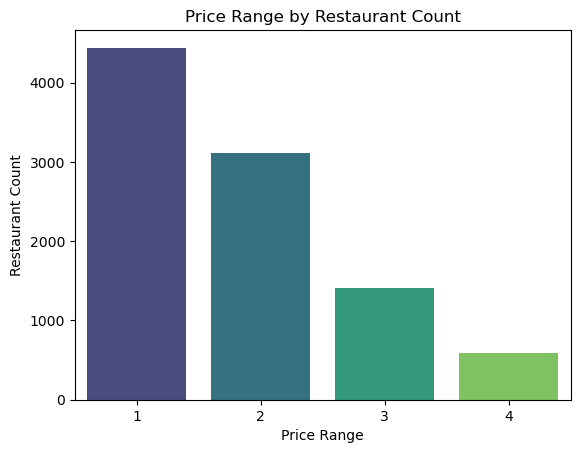

In [51]:
# TASK 3 PART 1

resto = df[["Restaurant Name","Price range"]]
resto
restaurant_count = resto.groupby("Price range").count().reset_index()
restaurant_count = restaurant_count.rename(columns={"Restaurant Name": "Restaurant Count"})
import matplotlib.pyplot as plt 
import seaborn as sns
sns.barplot(x="Price range", y="Restaurant Count", data=restaurant_count, palette="viridis")
plt.title("Price Range by Restaurant Count")
plt.xlabel("Price Range")
plt.ylabel("Restaurant Count")

# TASK 3 PART 2

restaurant_count["Percentage"] = 100*restaurant_count["Restaurant Count"]/sum(restaurant_count["Restaurant Count"])
print("Following are the percentage of restaurants in each price range category")
print(restaurant_count)

In [52]:
#  TASK 4 PART 1

online_dev = df[["Restaurant Name","Has Online delivery"]]
online_delivery_percentage = (online_dev["Has Online delivery"].value_counts(normalize=True) * 100).round(2).to_frame()
print(online_delivery_percentage.iloc[1,0], "% of the restaurants offer online delivery")

25.67 % of the restaurants offer online delivery


In [53]:
# TASK 4 PART 2

avg_rating = df.groupby("Has Online delivery")["Aggregate rating"].mean().round(2)
print("Average rating for restaurants with online delivery:", avg_rating["Yes"])
print("Average rating for restaurants without online delivery:", avg_rating["No"])

Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.46


(array([2.148e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 7.000e+00, 1.500e+01, 2.700e+01, 4.700e+01,
        8.700e+01, 1.100e+02, 1.910e+02, 2.500e+02, 3.150e+02, 3.810e+02,
        4.680e+02, 5.190e+02, 5.220e+02, 4.830e+02, 4.950e+02, 4.800e+02,
        4.580e+02, 4.270e+02, 4.000e+02, 3.350e+02, 2.660e+02, 2.740e+02,
        2.210e+02, 1.740e+02, 1.440e+02, 9.500e+01, 7.800e+01, 4.200e+01,
        2.500e+01, 6.100e+01]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 , 1.078, 1.176, 1.274, 1.372, 1.47 , 1.568, 1.666,
        1.764, 1.862, 1.96 , 2.058, 2.156, 2.254, 2.352, 2.45 , 2.548,
        2.646, 2.744, 2.842, 2.94 , 3.038, 3.136, 3.234, 3.332, 3.43 ,
        3.528, 3.626, 3.724, 3.822, 3.92 , 4.018, 4.116, 4.214, 4.312,
        4.41 , 4.508,

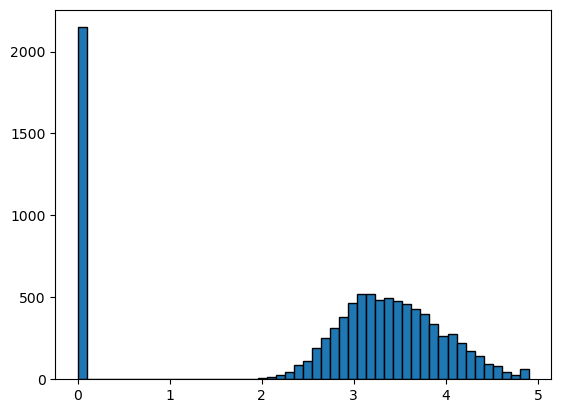

In [54]:
## LEVEL 2 TASK 1 PART 1

import matplotlib.pyplot as plt 
plt.hist(df["Aggregate rating"], bins=50, edgecolor="black") 

Since the graph looks like a bell shaped curve, hence it follows Normal Dsitribution


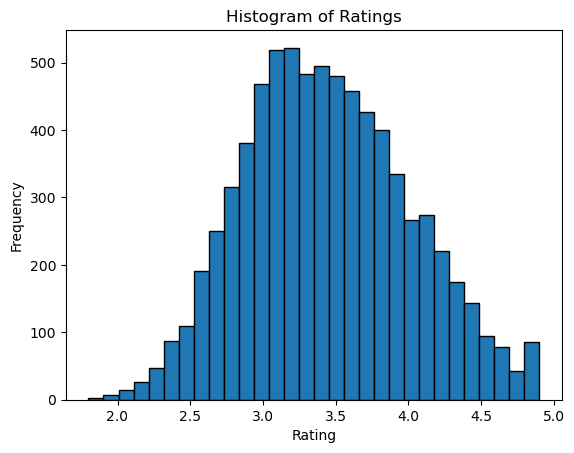

In [55]:
filtered_data = df[df["Aggregate rating"] != 0]["Aggregate rating"]
plt.hist(filtered_data, bins=30, edgecolor="black") 
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
print("Since the graph looks like a bell shaped curve, hence it follows Normal Dsitribution")

In [56]:
rating=[]
for i in df["Aggregate rating"]:
    if 0<=i<=1.0:
        rating.append("0-1")
    elif 1.1<=i<=2.0:
        rating.append("1-2")
    elif 2.1<=i<=3.0:
        rating.append("2-3")
    elif 3.1<=i<=4.0:
         rating.append("3-4") 
    elif 4.1<=i<=5.0:
        rating.append("4-5")
        
from collections import Counter
elements_count = Counter(rating)
print(elements_count)
print("3-4 is the most common rating range")

Counter({'3-4': 4385, '0-1': 2148, '2-3': 1891, '4-5': 1114, '1-2': 10})
3-4 is the most common rating range


In [57]:
# TASK 1 PART 2

avg_votes = df.groupby("Restaurant Name")["Votes"].mean().round(2).to_frame().sort_values(by="Votes",ascending=False)
print("Following are the average number of votes received by restaurants")
print(avg_votes)

Following are the average number of votes received by restaurants
                      Votes
Restaurant Name            
Toit                10934.0
Hauz Khas Social     7931.0
Peter Cat            7574.0
Big Brewsky          5705.0
The Black Pearl      5385.0
...                     ...
Ravi Fast Food          0.0
Ratan Singh             0.0
Rara Dragon             0.0
Rana's Food Corner      0.0
Cake And Bakes          0.0

[7443 rows x 1 columns]


In [58]:
# TASK 2 PART 1

a = df["Cuisines"].value_counts().reset_index()
filtered_rows = []

for index, row in a.iterrows():
    cuisines = row["Cuisines"].split(",")
    if len(cuisines) > 1:
        filtered_rows.append(row)
filtered_df = pd.DataFrame(filtered_rows)
print("Follwing are the most common combinations of cuisines in the dataset")
print(filtered_df)

Follwing are the most common combinations of cuisines in the dataset
                                               Cuisines  count
1                                 North Indian, Chinese    511
4                                 North Indian, Mughlai    334
7                        North Indian, Mughlai, Chinese    197
8                                      Bakery, Desserts    170
10                                     Pizza, Fast Food    131
...                                                 ...    ...
1820                                 Bengali, Fast Food      1
1821                    North Indian, Rajasthani, Asian      1
1822               Chinese, Thai, Malaysian, Indonesian      1
1823  Bakery, Desserts, North Indian, Bengali, South...      1
1824                             Italian, World Cuisine      1

[1731 rows x 2 columns]


In [59]:
# TASK 2 PART 2

a = df["Aggregate rating"]
b = filtered_df["Cuisines"]

combo = pd.concat([b, a], axis=1)
avg_rating_by_cuisine = combo.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).reset_index()
print(avg_rating_by_cuisine)

                                               Cuisines  Aggregate rating
0     Continental, American, Italian, North Indian, ...               4.9
1                               Japanese, Chinese, Thai               4.9
2                             Street Food, South Indian               4.9
3           North Indian, Chinese, Italian, Continental               4.9
4       Mithai, North Indian, South Indian, Street Food               4.9
...                                                 ...               ...
1726                   Mughlai, Pakistani, North Indian               0.0
1727                              Afghani, North Indian               0.0
1728                            Asian, Thai, Vegetarian               0.0
1729                     Continental, Italian, American               0.0
1730                    Continental, Chinese, Fast Food               0.0

[1731 rows x 2 columns]


In [60]:
# TASK 3 PART 1

import pandas as pd
center_latitude = df["Latitude"].mean()
center_longitude = df["Longitude"].mean()
import plotly.express as px
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Restaurant Name", zoom=1,center={"lat": center_latitude, "lon": center_longitude})
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [61]:
# TASK 3 PART 2

print("The most clustered country is India followed by USA and Australia")

In [62]:
# TASK 4 PART 1

restaurant_counts = df.groupby("Restaurant Name").size().reset_index(name="count").sort_values(by="count",ascending=False)
print(restaurant_counts)

                              Restaurant Name  count
1098                          Cafe Coffee Day     83
2097                           Domino's Pizza     79
6103                                   Subway     63
2715                         Green Chick Chop     51
4075                               McDonald's     48
...                                       ...    ...
2617                    Gian Ji Punjabi Dhaba      1
2616  Ghungroo Club & Bar - By Gautam Gambhir      1
2615                            Ghar Ki Handi      1
2614                             Ghar Ka Swad      1
7442                        �ukura��a Sofras۱      1

[7443 rows x 2 columns]


In [63]:
filtered_resto_chain = restaurant_counts[restaurant_counts["count"] > 1]
print(filtered_resto_chain)
print("Restaurant chains are present in the dataset.")

                     Restaurant Name  count
1098                 Cafe Coffee Day     83
2097                  Domino's Pizza     79
6103                          Subway     63
2715                Green Chick Chop     51
4075                      McDonald's     48
...                              ...    ...
3570                   Konetto Pizza      2
3437  Kaveri Restaurant And Caterers      2
150                     Adarsh Kulfi      2
4022    Manohar Dairy And Restaurant      2
7057   Underdoggs Sports Bar & Grill      2

[734 rows x 2 columns]
Restaurant chains are present in the dataset.


In [64]:
# TASK 4 PART 2

restaurant_agg = df.groupby("Restaurant Name")["Aggregate rating"].mean().to_frame().reset_index()
merged_table = pd.merge(filtered_resto_chain,restaurant_agg,on = "Restaurant Name", how = "left").sort_values(by = "Aggregate rating",ascending = False).round(1).reset_index(drop=True)
merged_table

Popularity = []
for i in merged_table["Aggregate rating"]:
    if i>=4.5:
        Popularity.append("Excellent")
    elif 4.0<=i<4.5:
        Popularity.append("Very Good")
    elif 3.5<=i<4.0:
        Popularity.append("Good")
    elif 2.5<=i<3.5:
        Popularity.append("Average")
    elif 0<i<2.5:
        Popularity.append("Poor")
    else:
        Popularity.append("Not rated")
        
merged_table["Popularity"]= Popularity
print(merged_table)

               Restaurant Name  count  Aggregate rating Popularity
0             Talaga Sampireun      3               4.9  Excellent
1      AB's Absolute Barbecues      2               4.8  Excellent
2             Silantro Fil-Mex      2               4.8  Excellent
3    AB's - Absolute Barbecues      4               4.8  Excellent
4           Naturals Ice Cream      2               4.8  Excellent
..                         ...    ...               ...        ...
729   Rasoi - The Indian Zaika      2               0.0  Not rated
730              Ghar Ka Khana      2               0.0  Not rated
731    Special Chicken Biryani      2               0.0  Not rated
732                    Foodies      3               0.0  Not rated
733           Murliwala Bakers      2               0.0  Not rated

[734 rows x 4 columns]


In [65]:
# LEVEL 3 TASK 1 PART 1

common_pos_neg = df.groupby("Rating text")["Rating text"].value_counts()
com= df.groupby("Rating text")["Aggregate rating"].mean()
merg = pd.merge(common_pos_neg,com,on = "Rating text", how="left")
print(merg.sort_values(by="Aggregate rating",ascending=False))

''' On the basis of Aggregate rating we determine which Rating text are positive and negative Keywords 
and count values indicate which keyword is most common positive and common negative keyword.
From the output we can say that very good is most common positive keyword
and Average is most common negative keyword '''


             count  Aggregate rating
Rating text                         
Excellent      301          4.659801
Very Good     1079          4.168119
Good          2100          3.683429
Average       3734          3.051339
Poor           186          2.297849
Not rated     2148          0.000000


' On the basis of Aggregate rating we determine which Rating text are positive and negative Keywords \nand count values indicate which keyword is most common positive and common negative keyword.\nFrom the output we can say that very good is most common positive keyword\nand Average is most common negative keyword '

In [66]:
# TASK 1 PART 2

merged_table["Review Length"] = merged_table["Popularity"].apply(len)       
final_merged_table = merged_table[merged_table["Aggregate rating"] != 0]
print(final_merged_table)
grouped_data = final_merged_table.groupby("Popularity").agg({"Aggregate rating": "mean", "Review Length": "mean"}).reset_index().sort_values(by="Aggregate rating",ascending=False)

''' From the output we can say that Review length with the value of 9 are Positive keywords
whereas all other Review Length values which are less than 9 are Negative keywords
Since we have 5 types of Rating Text (as Not rated does not fall in either positive or negative keyword catgeory) 
Good is the middle value and hence we consider it as neutral with Review Length value as 4 '''

                 Restaurant Name  count  Aggregate rating Popularity  \
0               Talaga Sampireun      3               4.9  Excellent   
1        AB's Absolute Barbecues      2               4.8  Excellent   
2               Silantro Fil-Mex      2               4.8  Excellent   
3      AB's - Absolute Barbecues      4               4.8  Excellent   
4             Naturals Ice Cream      2               4.8  Excellent   
..                           ...    ...               ...        ...   
677              Aggarwal Sweets     14               0.8       Poor   
678                      Mx Corn      4               0.8       Poor   
679       Kwality Wall's Swirl's      4               0.8       Poor   
680                   Chai Garam      4               0.7       Poor   
681  Bikaner Sweets & Restaurant      6               0.5       Poor   

     Review Length  
0                9  
1                9  
2                9  
3                9  
4                9  
..       

' From the output we can say that Review length with the value of 9 are Positive keywords\nwhereas all other Review Length values which are less than 9 are Negative keywords\nSince we have 5 types of Rating Text (as Not rated does not fall in either positive or negative keyword catgeory) \nGood is the middle value and hence we consider it as neutral with Review Length value as 4 '

In [67]:
# TASK 2 PART 1

restaurant_votes = df.groupby("Restaurant Name")["Votes"].sum().to_frame().sort_values(by="Votes",ascending=False)
restaurant_votes
print("Following are the restaurants with highest number of votes")
restaurant_votes.head(10)

Following are the restaurants with highest number of votes


,Votes
Restaurant Name,
Barbeque Nation,28142
AB's - Absolute Barbecues,13400
Toit,10934
Big Chill,10853
Farzi Cafe,10098
Truffles,9682
Chili's,8156
Hauz Khas Social,7931
Joey's Pizza,7807


In [68]:
low_votes = restaurant_votes[restaurant_votes["Votes"] == 0]
print("Following are the restaurants with lowest number of votes")
print(low_votes)

Following are the restaurants with lowest number of votes
                                Votes
Restaurant Name                      
Al Hayat Bakers                     0
Green Chilli Fast Food              0
Tirath Sweets                       0
Bawarchi's Canteen                  0
Khan Tandoori Hub                   0
...                               ...
Modi's Baker's Zone                 0
Fumble Foods                        0
Shree Jagannath Restaurant          0
Mohanty Bakery & Confectionery      0
Flavours Of Delhi                   0

[907 rows x 1 columns]


In [69]:
# TASK 2 PART 2

correln = df["Aggregate rating"].corr(df["Votes"]).round(2)
print(correln, "is the correlation between the number of votes and the rating of a restaurant")

0.31 is the correlation between the number of votes and the rating of a restaurant


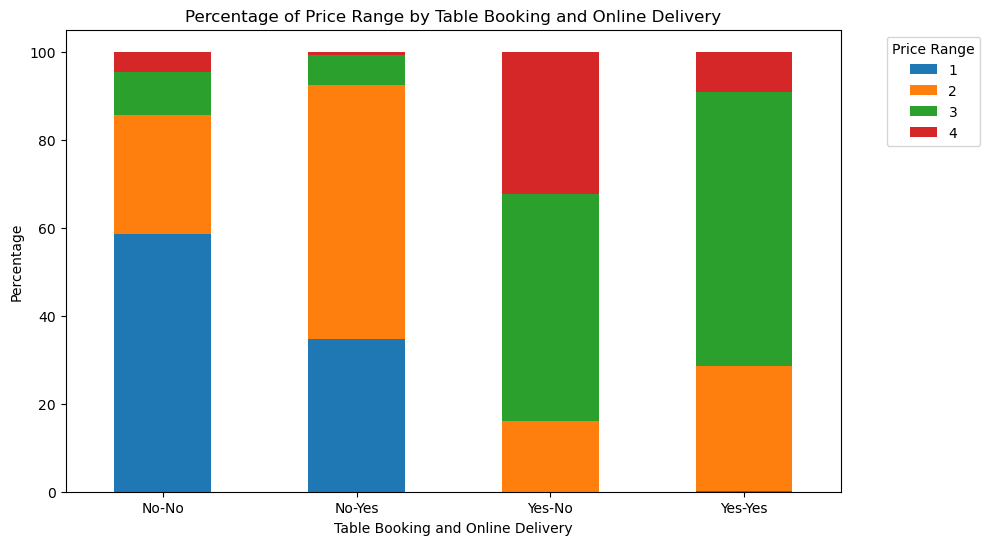

Our graph portrays that as price range increases, amount of facilties is also increasing gradually


In [70]:
# TASK 3 PART 1

import matplotlib.pyplot as plt
df['Group'] = df['Has Table booking'] + '-' + df['Has Online delivery']
grouped_counts = df.groupby(['Group', 'Price range']).size().unstack(fill_value=0)
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100
grouped_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Table Booking and Online Delivery')
plt.ylabel('Percentage')
plt.title('Percentage of Price Range by Table Booking and Online Delivery')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# TASK 3 PART 2

print("Our graph portrays that as price range increases, amount of facilties is also increasing gradually")